# Import libraries

In [21]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Helping Functions

In [22]:
def print_unique(col):
    """
    Prints the unique values in a column and their count.

    Args:
        col (series): a specific column from a data frame.
    """
    temp = col.unique()
    temp.sort()
    print(temp)
    
    temp_count = col.value_counts().sort_values(ascending=False)
    print(temp_count)
    
    
    
def identify_categories(data):
    """
    Finds the categorical features (columns) in a data frame.

    Args:
        data (Data Frame): Training Data.
    """
    cat_cols = [cname for cname in data.columns if
                    data[cname].dtype == "object"]
    
    return cat_cols

# Loading and Inspecting The Data

In [23]:
train_data_path = r"C:\Users\Youssouf El-Gammal\Desktop\Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Portal\prosperLoanData.csv"

prosper_data = pd.read_csv(train_data_path)

# Training data inspection
print("Shape of the training data: ", prosper_data.shape)
print("- " * 70)

print(prosper_data.info())
print("- " * 70)

prosper_data.head(10)

Shape of the training data:  (113937, 81)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                   

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [24]:
prosper_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


# Dropping Useless Columns
From inspecting the data tere were some "ID" columns which will be irrelevent for our process.

In [25]:
prosper_data.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey",
                 "LoanNumber","MemberKey","DateCreditPulled"], inplace= True )

In [26]:
print(prosper_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 74 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingCreationDate                  113937 non-null  object 
 1   CreditGrade                          28953 non-null   object 
 2   Term                                 113937 non-null  int64  
 3   LoanStatus                           113937 non-null  object 
 4   ClosedDate                           55089 non-null   object 
 5   BorrowerAPR                          113912 non-null  float64
 6   BorrowerRate                         113937 non-null  float64
 7   LenderYield                          113937 non-null  float64
 8   EstimatedEffectiveYield              84853 non-null   float64
 9   EstimatedLoss                        84853 non-null   float64
 10  EstimatedReturn                      84853 non-null   float64
 11  ProsperRating

# Detecting Missing Values

In [27]:
# Using isnull()
missing_val_count = prosper_data.isnull().sum()
print(missing_val_count[missing_val_count > 0])

CreditGrade                            84984
ClosedDate                             58848
BorrowerAPR                               25
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ProsperScore                           29084
BorrowerState                           5515
Occupation                              3588
EmploymentStatus                        2255
EmploymentStatusDuration                7625
CreditScoreRangeLower                    591
CreditScoreRangeUpper                    591
FirstRecordedCreditLine                  697
CurrentCreditLines                      7604
OpenCreditLines                         7604
TotalCreditLinespast7years               697
InquiriesLast6Months                     697
TotalInquiries                          1159
CurrentDelinquencies                     697
AmountDeli

# Data Visualizations
### Univariate Plots

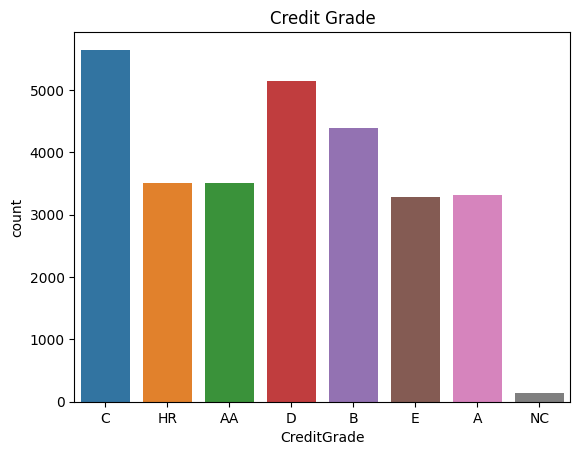

In [28]:
sns.countplot(data = prosper_data, x = 'CreditGrade');
plt.title('Credit Grade')
plt.xlabel('CreditGrade');

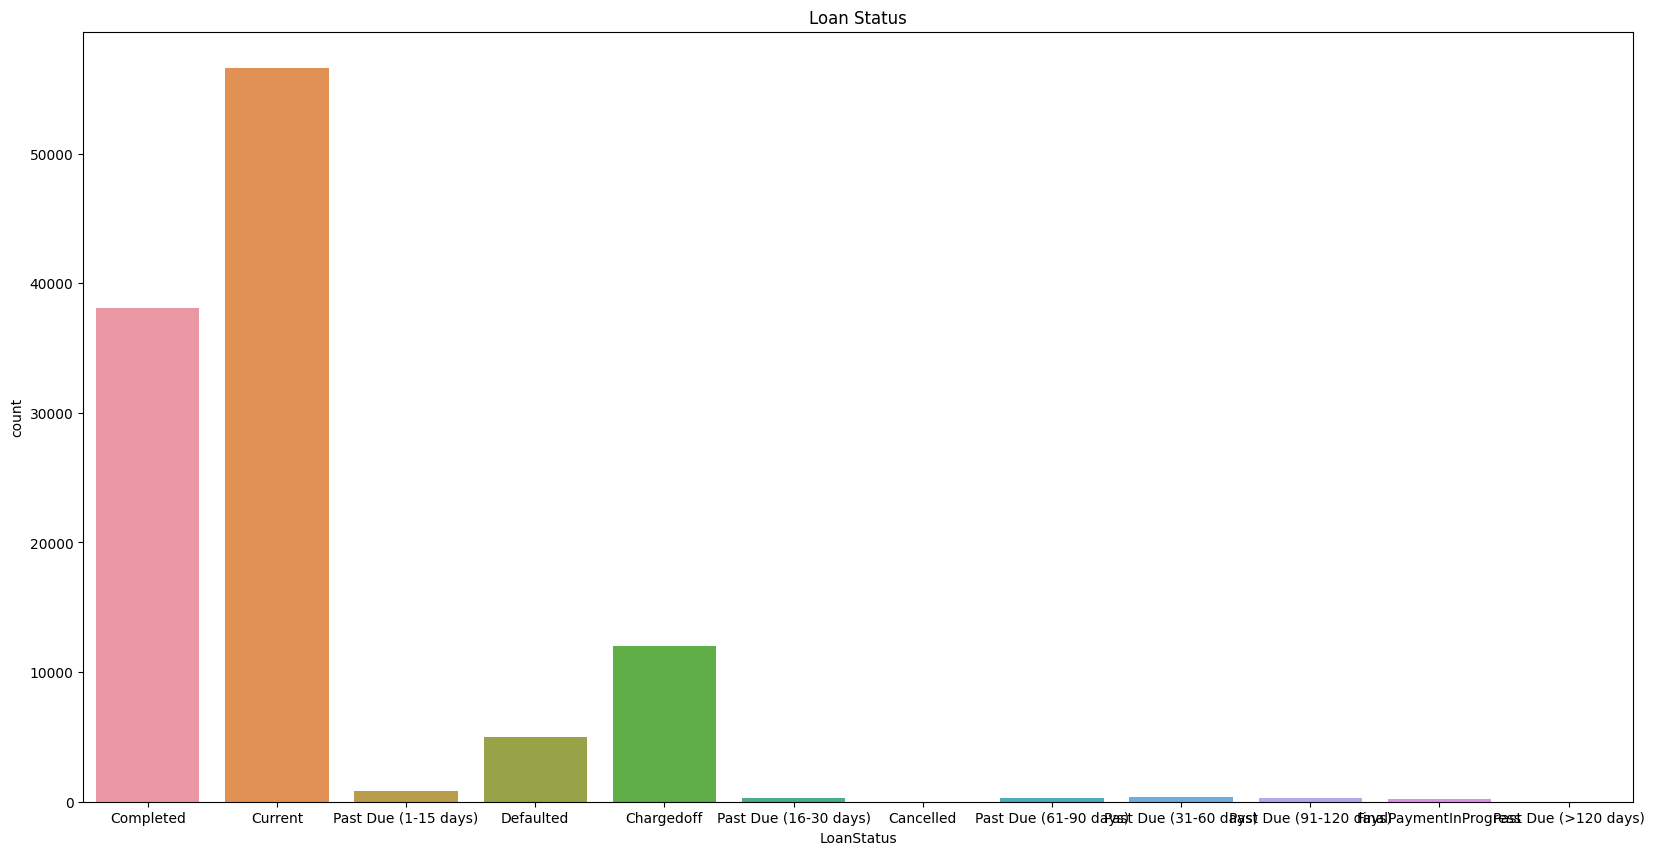

In [29]:
plt.figure(figsize=(20, 10))
sns.countplot(data = prosper_data, x = 'LoanStatus');
plt.title('Loan Status')
plt.xlabel('LoanStatus');

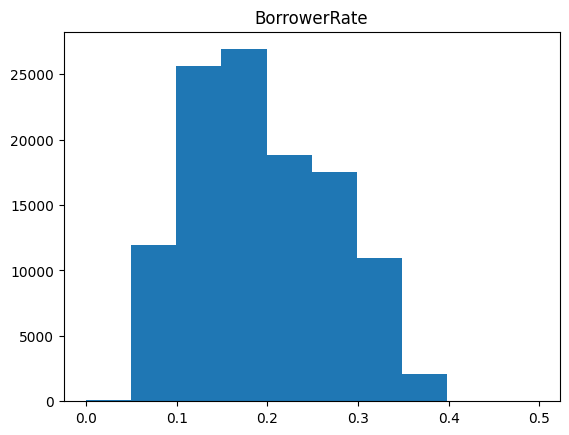

In [30]:
plt.hist(prosper_data['BorrowerRate'])
plt.title("BorrowerRate")
plt.show()

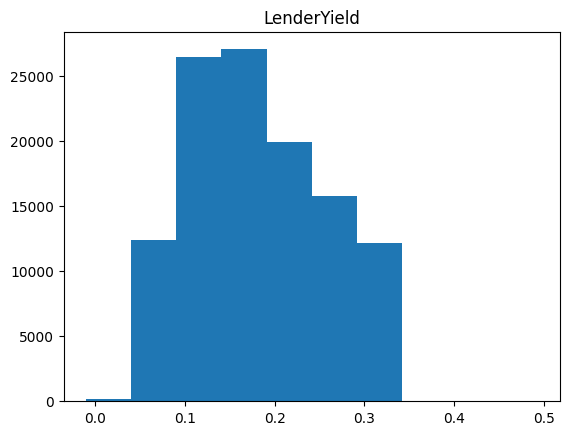

In [31]:
plt.hist(prosper_data['LenderYield'])
plt.title("LenderYield")
plt.show()

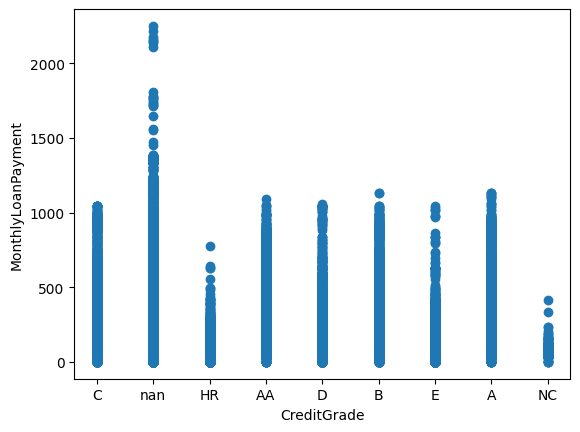

In [32]:
plt.scatter(prosper_data['CreditGrade'].astype(str), prosper_data['MonthlyLoanPayment'])
plt.xlabel('CreditGrade')
plt.ylabel('MonthlyLoanPayment')
plt.show()

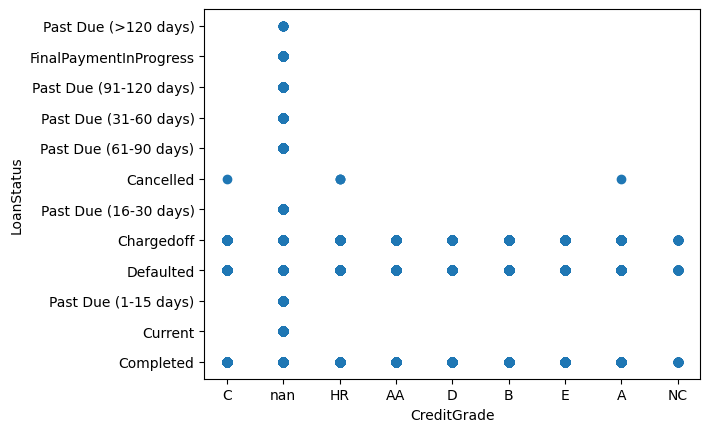

In [33]:
plt.scatter(prosper_data['CreditGrade'].astype(str), prosper_data['LoanStatus'])
plt.xlabel('CreditGrade')
plt.ylabel('LoanStatus')
plt.show()

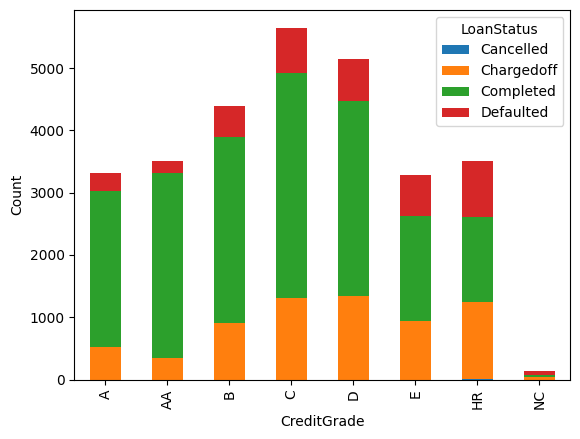

In [34]:
ct = pd.crosstab(prosper_data['CreditGrade'], prosper_data['LoanStatus'])

ct.plot(kind='bar', stacked=True)
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.legend(title='LoanStatus')
plt.show()

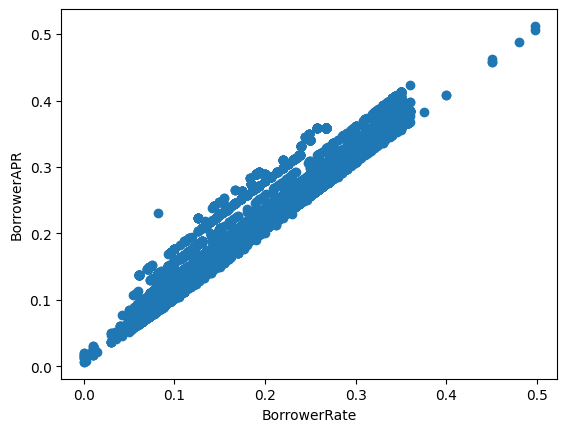

In [35]:
plt.scatter(prosper_data['BorrowerRate'], prosper_data['BorrowerAPR'])
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.show()

# Handeling Missing Values
Dropping columns with more than 70% missing.

In [36]:
def null_values(missing_val_count):  
    for i in range(len(missing_val_count)) :
        if missing_val_count[i] != 0 :
            x = missing_val_count[i]
            col = prosper_data.columns[i]
            y= (x / prosper_data.shape[0]) * 100
            
            print(f"col num: {str(i)} / {col} / {str(x)} nulls /{str(round(y, 2))} %")

null_values(missing_val_count)         

col num: 1 / CreditGrade / 84984 nulls /74.59 %
col num: 4 / ClosedDate / 58848 nulls /51.65 %
col num: 5 / BorrowerAPR / 25 nulls /0.02 %
col num: 8 / EstimatedEffectiveYield / 29084 nulls /25.53 %
col num: 9 / EstimatedLoss / 29084 nulls /25.53 %
col num: 10 / EstimatedReturn / 29084 nulls /25.53 %
col num: 11 / ProsperRating (numeric) / 29084 nulls /25.53 %
col num: 12 / ProsperRating (Alpha) / 29084 nulls /25.53 %
col num: 13 / ProsperScore / 29084 nulls /25.53 %
col num: 15 / BorrowerState / 5515 nulls /4.84 %
col num: 16 / Occupation / 3588 nulls /3.15 %
col num: 17 / EmploymentStatus / 2255 nulls /1.98 %
col num: 18 / EmploymentStatusDuration / 7625 nulls /6.69 %
col num: 21 / CreditScoreRangeLower / 591 nulls /0.52 %
col num: 22 / CreditScoreRangeUpper / 591 nulls /0.52 %
col num: 23 / FirstRecordedCreditLine / 697 nulls /0.61 %
col num: 24 / CurrentCreditLines / 7604 nulls /6.67 %
col num: 25 / OpenCreditLines / 7604 nulls /6.67 %
col num: 26 / TotalCreditLinespast7years / 697

In [37]:
prosper_data.drop(columns=["CreditGrade","TotalProsperLoans","TotalProsperPaymentsBilled",
                 "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","OnTimeProsperPayments"], inplace= True )

In [39]:
prosper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 64 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingCreationDate                 113937 non-null  object 
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   ClosedDate                          55089 non-null   object 
 4   BorrowerAPR                         113912 non-null  float64
 5   BorrowerRate                        113937 non-null  float64
 6   LenderYield                         113937 non-null  float64
 7   EstimatedEffectiveYield             84853 non-null   float64
 8   EstimatedLoss                       84853 non-null   float64
 9   EstimatedReturn                     84853 non-null   float64
 10  ProsperRating (numeric)             84853 non-null   float64
 11  ProsperRating (Alpha)     